In [36]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_digits
from PIL import Image

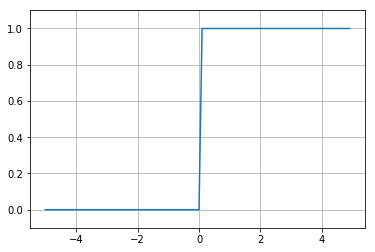

In [5]:
# 定义阶越函数
def step_func(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_func(x)
plt.plot(x,y)
# 指定y轴范围
plt.ylim(-0.1, 1.1)
plt.grid()

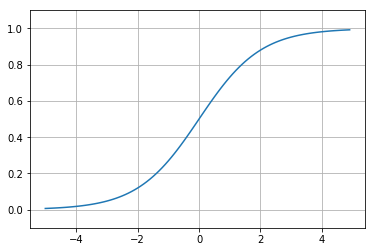

In [4]:
# Sigmoid函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.grid()

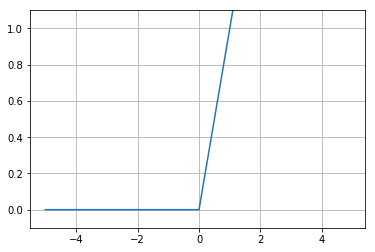

In [7]:
# 激活函数不能使用线性函数：不管有多深，总能找到与之等效的 无隐藏层的神经网络
# ReLU（Rectified Linear Unit）激活函数
def relu(x):
    return np.maximum(0,x)  # 从输入的数值中找到最大的输出
x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.grid()

In [10]:
class EasyNet:
    def __init__(self):
        self.network = {}
        self.network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        self.network['b1'] = np.array([0.1, 0.2, 0.3])
        self.network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        self.network['b2'] = np.array([0.1, 0.2])
        self.network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
        self.network['b3'] = np.array([0.1, 0.2])
    def forward(self,x):
        W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
        b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        identity_func = lambda x:x
        y = identity_func(a3)
        return y
network = EasyNet()
x = np.array([1.0,0.5])
y = network.forward(x)
y

array([0.31682708, 0.69627909])

In [29]:
# softmax函数,粗略版本，容易溢出，导致计算错误
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

# 更新版,在原公式上分子分母同乘以一个常数结果值不变
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [45]:
# 导入手写数字图像数据
digits = load_digits()
# 取出第一张图片和第一个标签
img = digits.data[0]
label = digits.target[0]
# 可视化图片
# img.shape
imgre = img.reshape(8,8)
# pil_img = Image.fromarray(np.uint8(img))
# pil_img.show()
print(imgre)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [63]:
# 用神经网络进行推理
class EasyNet:
    def __init__(self):
        self.network = {}
        self.network['W1'] = np.random.rand(192).reshape(64,3)
        self.network['b1'] = np.random.rand(3)
        self.network['W2'] = np.random.rand(30).reshape(3,10)
        self.network['b2'] = np.random.rand(10)
        self.network['W3'] = np.random.rand(100).reshape(10,10)
        self.network['b3'] = np.random.rand(10)
    def forward(self,x):
        W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
        b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = softmax(a3)
        return y
network = EasyNet()
print(img.shape)
x = np.array(img)
y = network.forward(x)
print(f'预测值为：{np.where(y ==np.max(y))[0]}')

(64,)
[0.1187141  0.02672617 0.05262856 0.04423248 0.04028192 0.0358535
 0.13977561 0.09574119 0.05629948 0.38974698]
预测值为：[9]
